# Machine Learning HW2 Simulation Part (Parzen Window from Scratch)
## Amirmahdi Ansaripour (810198358)

In this question, the probability distribution of a continuous variable is estimated through parzen window method.

At first, the effect of window length is discussed. It is worthwhile to mention that the kernel used for estimation has guassian distribution.

In the next step, the effect of number of samples on estimation's accuracy is analyzed. 

Finally, we have used the python already-prepared libraries for partA and compared the results respectively.

In [60]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.neighbors import KernelDensity
datapath = './archive/ted_main.csv'
df = pd.read_csv(datapath)
pi = math.pi

In [61]:
def guassian(normalized): ## The normalized format of parzen window input is given
    return ((1/pow(2*pi, 0.5)) * math.exp(-0.5 * pow(normalized, 2)))

def parzen_window(X, Vn):
    x_continuous = np.arange(min(X), max(X), 0.5)
    n = len(X)
    distribution = []
    for x in x_continuous:        
        distribution.append(1/(n*Vn) * sum([guassian((x - xi)/Vn) for xi in X]))
    return x_continuous, distribution

def plot_result(x, y, title):
    plt.figure(0)
    plt.plot(x, y)
    plt.xlabel("feature X (duration)")
    plt.ylabel("density")
    plt.title(title)
    plt.show()

In [62]:
dataset = []
for i in range(len(df['duration'])):
    dataset.append(df['duration'].iloc[i])

Pay attention that $distribution$ should be a vector of size [len(x_continuous), 1], because it is going to be plotted along with x_continuous in the final graph.

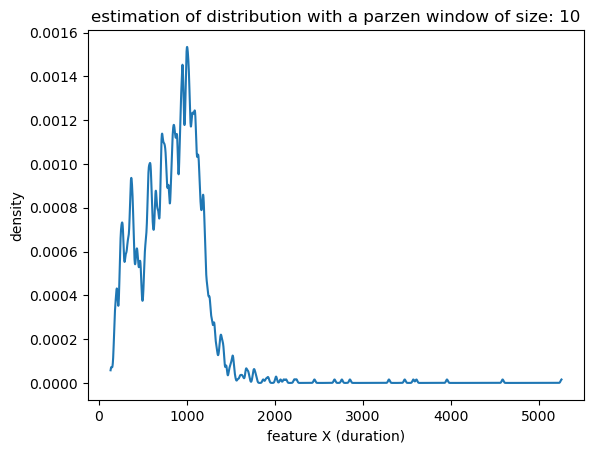

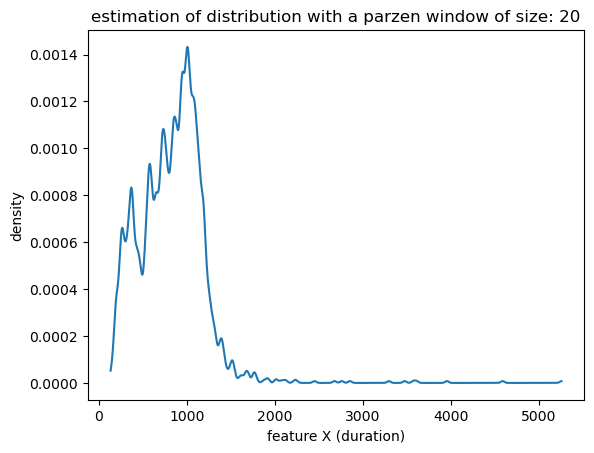

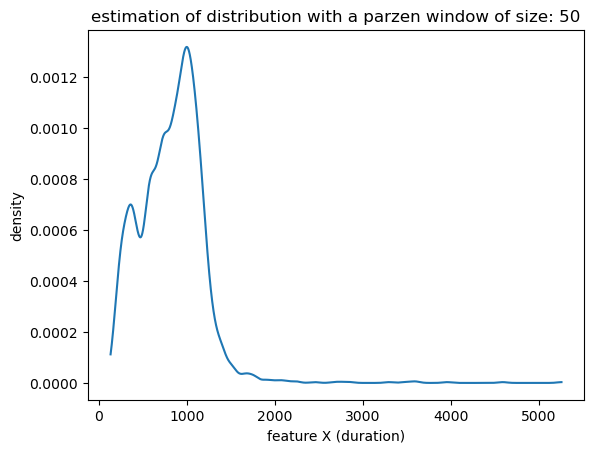

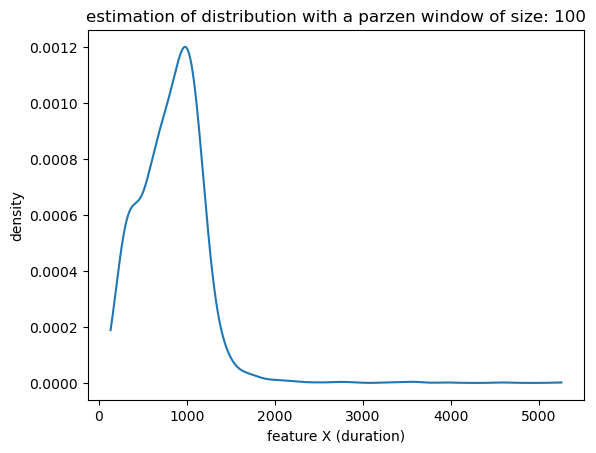

In [14]:
Vn = [10, 20, 50, 100]
for vn in Vn:
    x_continuous, distribution = parzen_window(dataset, vn)
    plot_result(x_continuous, distribution, "estimation of distribution with a parzen window of size: " + str(vn))

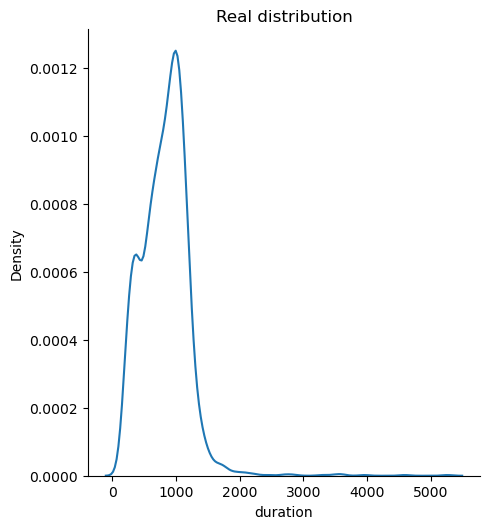

In [63]:
sns.displot(dataset, kind = "kde")
plt.title("Real distribution")
plt.xlabel("duration")
plt.show()

### The effect of window size  (Part A and B)

As the plots drawn above indicate, the estimated distribution with low window size is zigzagged and noisy (overfitted). The reason to that is the low lenght of guassian windows, each of which has a high peak and is unable to cover the whole domain. 

On the other hand, windows with wider length are more smooth and result in less noisy plots. However, we should mention that extremely high values for Vn hides the essential details of the main distribution, such as its local optimas. 

As a result, high Vn values leads to underfitting. 

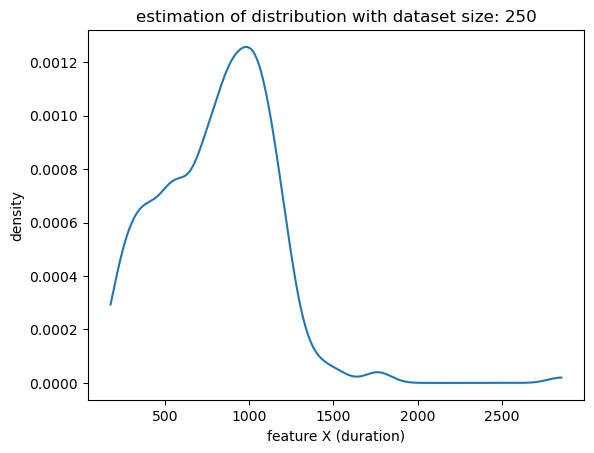

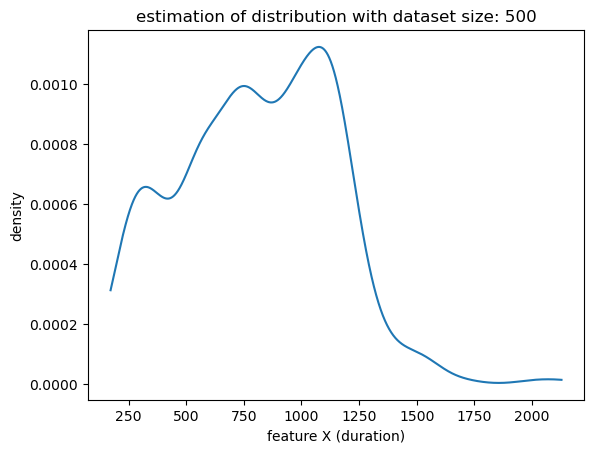

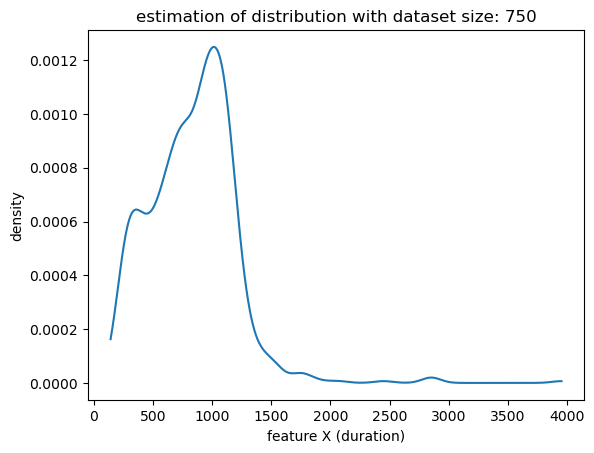

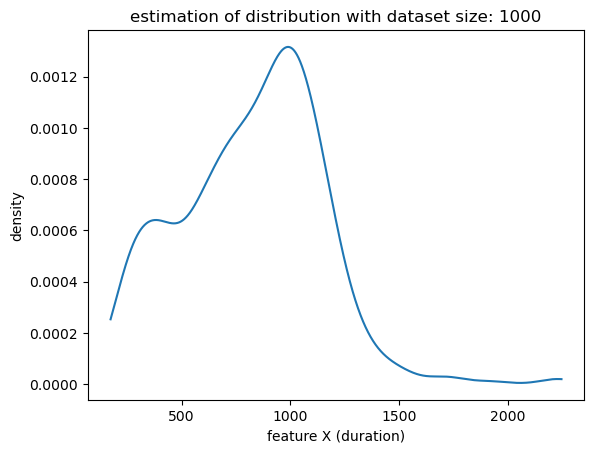

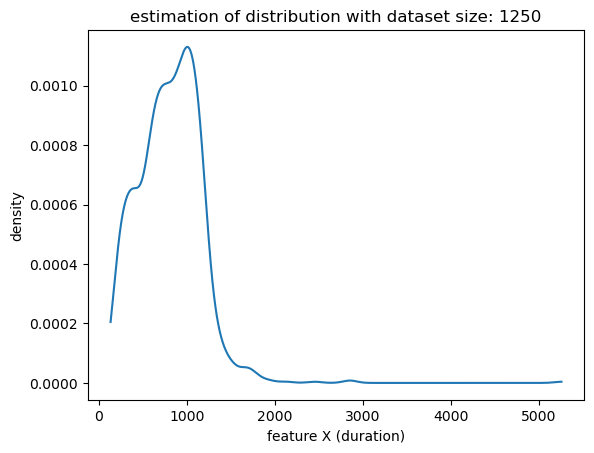

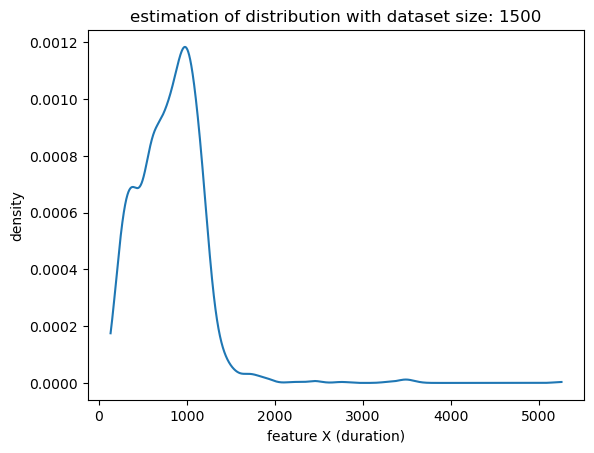

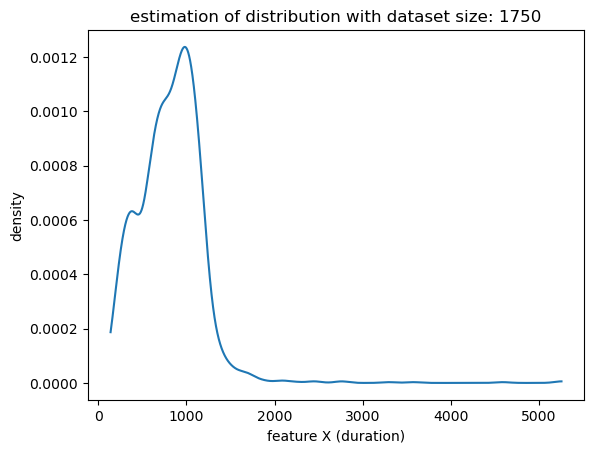

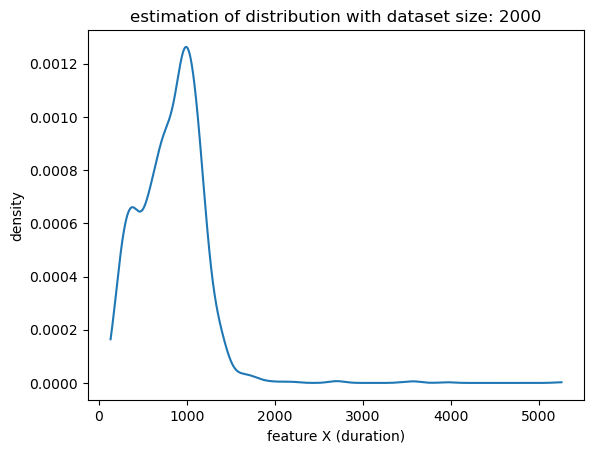

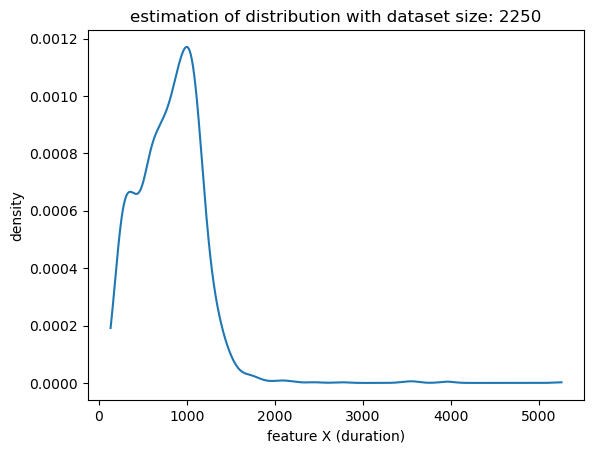

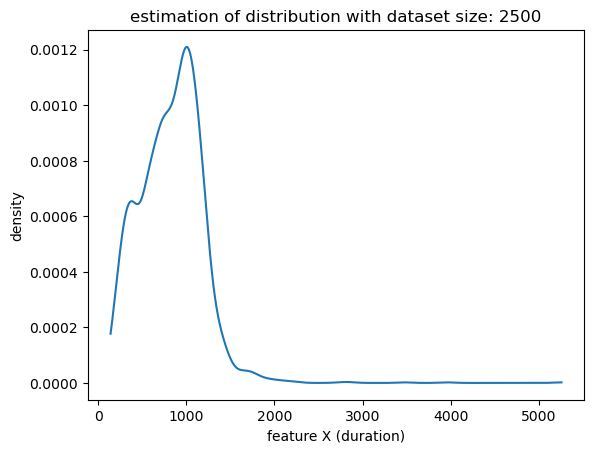

In [65]:
num_of_records = np.arange(250, len(dataset), 250)
random.seed(0)
for num in num_of_records:
    choices = random.choices(dataset, k = num)
    choices.sort()
    x_continuous, distribution = parzen_window(choices, 80)
    plot_result(x_continuous, distribution, "estimation of distribution with dataset size: " + str(num))

### The effect of number of samples (Part C)

As the plots suggests, our estimation fits the main distribution better when dataset size increases. Obviously, when there are not enough samples, original distribution's domain is not covered properly, which leads to inaccurate results.

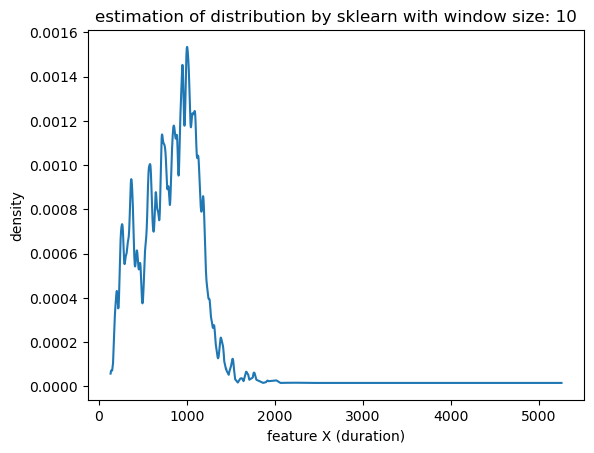

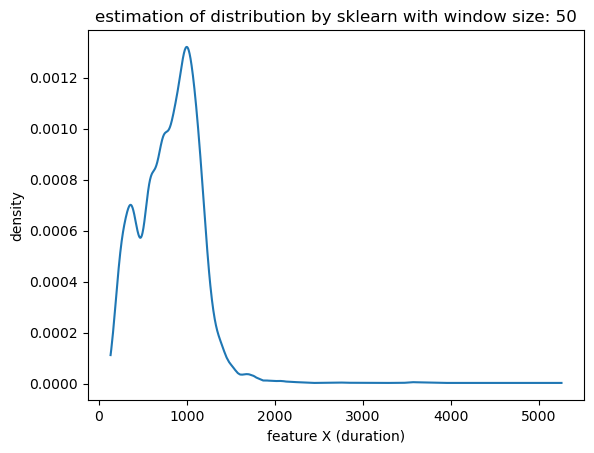

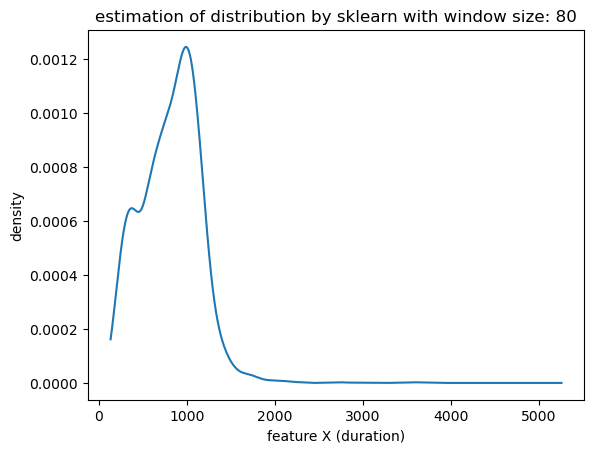

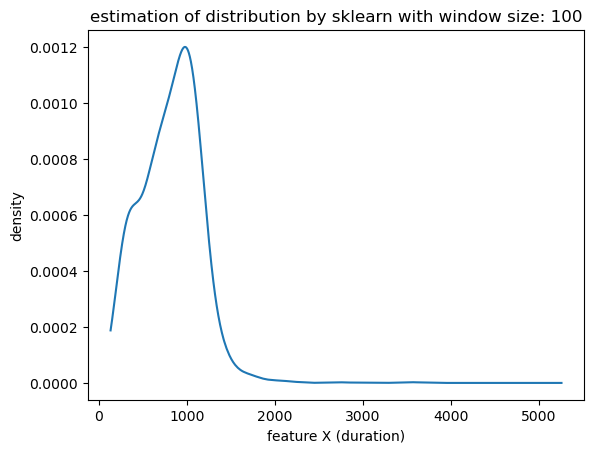

In [69]:
dataset.sort()
dataset2D = np.asarray(dataset)[:, np.newaxis]
for BW in [10, 50, 80, 100]:
    model = KernelDensity(kernel = "gaussian", bandwidth = BW)
    model.fit(dataset2D)
    estimated_dist = model.score_samples(dataset2D)
    plot_result(dataset2D, np.exp(estimated_dist), "estimation of distribution by sklearn with window size: " + str(BW))

### Output of already-prepared Python libraries for partA (Part D) 
Given the kernel distribution and window size, the results of sklearn libraries are similar to that of self-implemented functions.